In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [3]:
function TM(u, p, t)
    U(y) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
    σ(x) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
    du1 = (-u[1] + p[1] * log( 1.0 + exp( (p[5] * U(u[3]) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1.0 - u[2])/p[3] - U(u[3])*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2])
    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [4]:
function count_floats(a, b)
    count = 0
    if a > b
        a, b = b, a
    end
    while a < b
         a = nextfloat(a)
         count += 1
    end
    return count
end

count_floats (generic function with 1 method)

In [5]:
t = 200
tt = 500
tstep = 0.001
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [6]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.265;  const ΔU0 = 0.305;

In [70]:
I0 = -1.4
p =  [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [3.740482362235197, 0.8176653843010522, 0.4087238640418287]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.265, 0.305, 0.3, -1.4]
 time:          0.0
 state:         [3.740482362235197, 0.8176653843010522, 0.4087238640418287]


In [71]:
count_floats(Float32(-1.4), Float32(-1.715))

2642412

In [72]:
I0range = range( -1.4, -1.715, length = 3000 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.725
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-15, atol = 1e-20);

In [73]:
pmap_ = PoincareMap(ds, surface, rootkw = setting_root)

3-dimensional PoincareMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  TM
 hyperplane:    (2, 0.725)
 crossing time: 0.6047854048847933
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.265, 0.305, 0.3, -1.4]
 time:          0
 state:         [6.970825930922776, 0.725, 0.44132950719308045]


In [ ]:
idx_save = 1
output = orbitdiagram(pmap_, idx_save, idx_control_parameter, I0range; n = 500, Ttr = 250);

In [ ]:
f = Figure(resolution = (1200, 600))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25, xgridvisible = false, ygridvisible = false)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("black", 0.5), markersize = 1.5, marker = :circle)
end
f

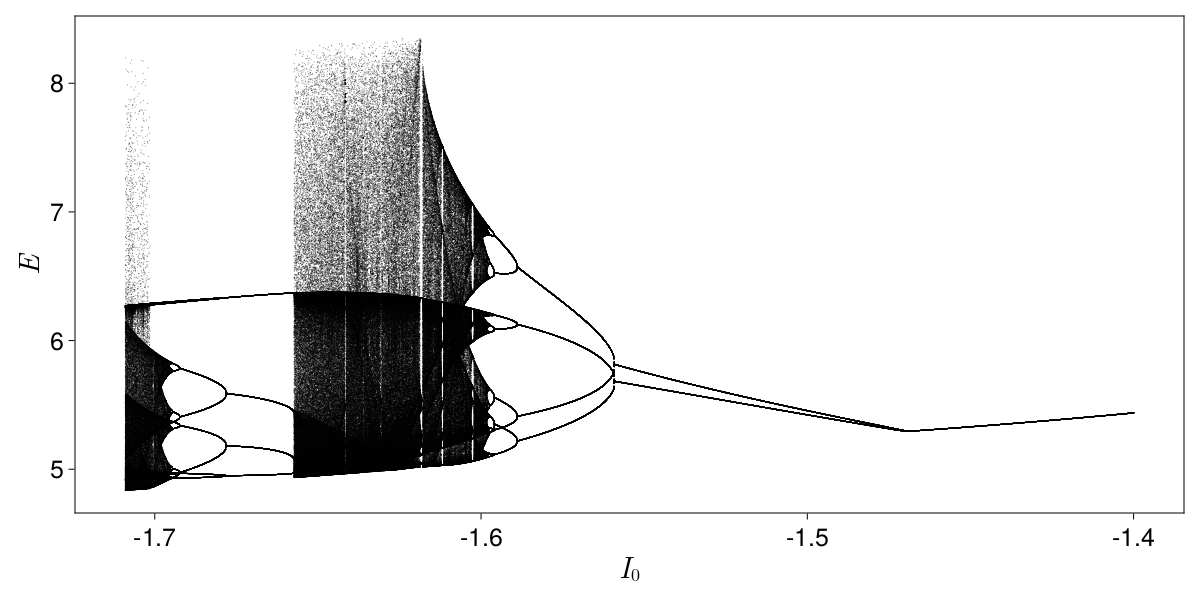

In [32]:
f = Figure(resolution = (1200, 600))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25, xgridvisible = false, ygridvisible = false)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("black", 0.5), markersize = 1.5, marker = :circle)
end
f

In [33]:
#save("bf U0=0.265 tauD.jld", "data", output)